# Creating a network structure with actors as nodes
Each individual actor should be considered as a node, while castmembers should be linked via edges. Therefor edges would represent a movie collaboration. 

In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx

In [2]:
moviesDf = pd.read_pickle("moviesDf.pkl")
moviesDf

,TitleId,MovieTitle,Actors
0,0000399,Jack and the Beanstalk,[Thomas White]
1,0000430,A Chess Dispute,[Alfred Collins]
2,0000653,A Calamitous Elopement,"[Harry Solter, Linda Arvidson, Charles Inslee,..."
3,0002816,The Drummer of the 8th,"[Cyril Gardner, Mildred Harris, Frank Borzage]"
4,0003662,The Battle of Elderbush Gulch,"[Mae Marsh, Leslie Loveridge, Alfred Paget, Ro..."
...,...,...,...
971,0088249,Terror in the Aisles,"[Donald Pleasence, Nancy Allen, Fred Asparagus..."
972,0088263,Michael Jackson: Thriller,"[Michael Jackson, Ola Ray, Brandon Scott Mille..."
973,0088323,The NeverEnding Story,"[Barret Oliver, Gerald McRaney, Chris Eastman,..."
974,0088381,Nausicaä of the Valley of the Wind,"[Sumi Shimamoto, Mahito Tsujimura, Minoru Yada..."


In [3]:

actor_column = list(moviesDf["Actors"].to_numpy())
G = nx.Graph()

for movie_cast in actor_column[:100]:
    G.add_nodes_from(movie_cast)
    
    if (len(movie_cast) > 1):
        for actor in movie_cast[1:]:
            G.add_edge(movie_cast[0], actor)
    
print(G.nodes())

['Thomas White', 'Alfred Collins', 'Harry Solter', 'Linda Arvidson', 'Charles Inslee', 'George Gebhardt', 'Robert Harron', 'Cyril Gardner', 'Mildred Harris', 'Frank Borzage', 'Mae Marsh', 'Leslie Loveridge', 'Alfred Paget', 'Lillian Gish', 'Charles Hill Mailes', 'Frank Opperman', 'Joseph McDermott', 'Violet MacMillan', 'Fred Woodward', 'Vivian Reed', 'Pierre Couderc', 'Juanita Hansen', 'Jacqueline Lovell', 'Frank Moore', 'Bernadine Zuber', 'Dave Anderson', 'Charles Chaplin', 'Edna Purviance', 'Ben Turpin', 'Peter Sellers', 'Fred Goodwins', 'Jack Henderson', 'Bud Jamison', 'John Rand', 'Billy Armstrong', 'Agnes Ayres', 'Robert Bolder', 'Charles Hitchcock', 'Charlotte Mineau', 'Courtenay Foote', 'Myrtle Stedman', 'Herbert Standing', 'Adele Farrington', 'George Berrell', 'Francesca Bertini', 'Dixie Carr', 'Jane Darwell', 'Marjorie Daw', 'Mabel Normand', 'Alice Davenport', 'Joe Bordeaux', 'Edgar Kennedy', 'Glen Cavender', 'Billy Gilbert', 'Frank Dolan', 'Ted Edwards', 'Keystone Kops', 'Eri

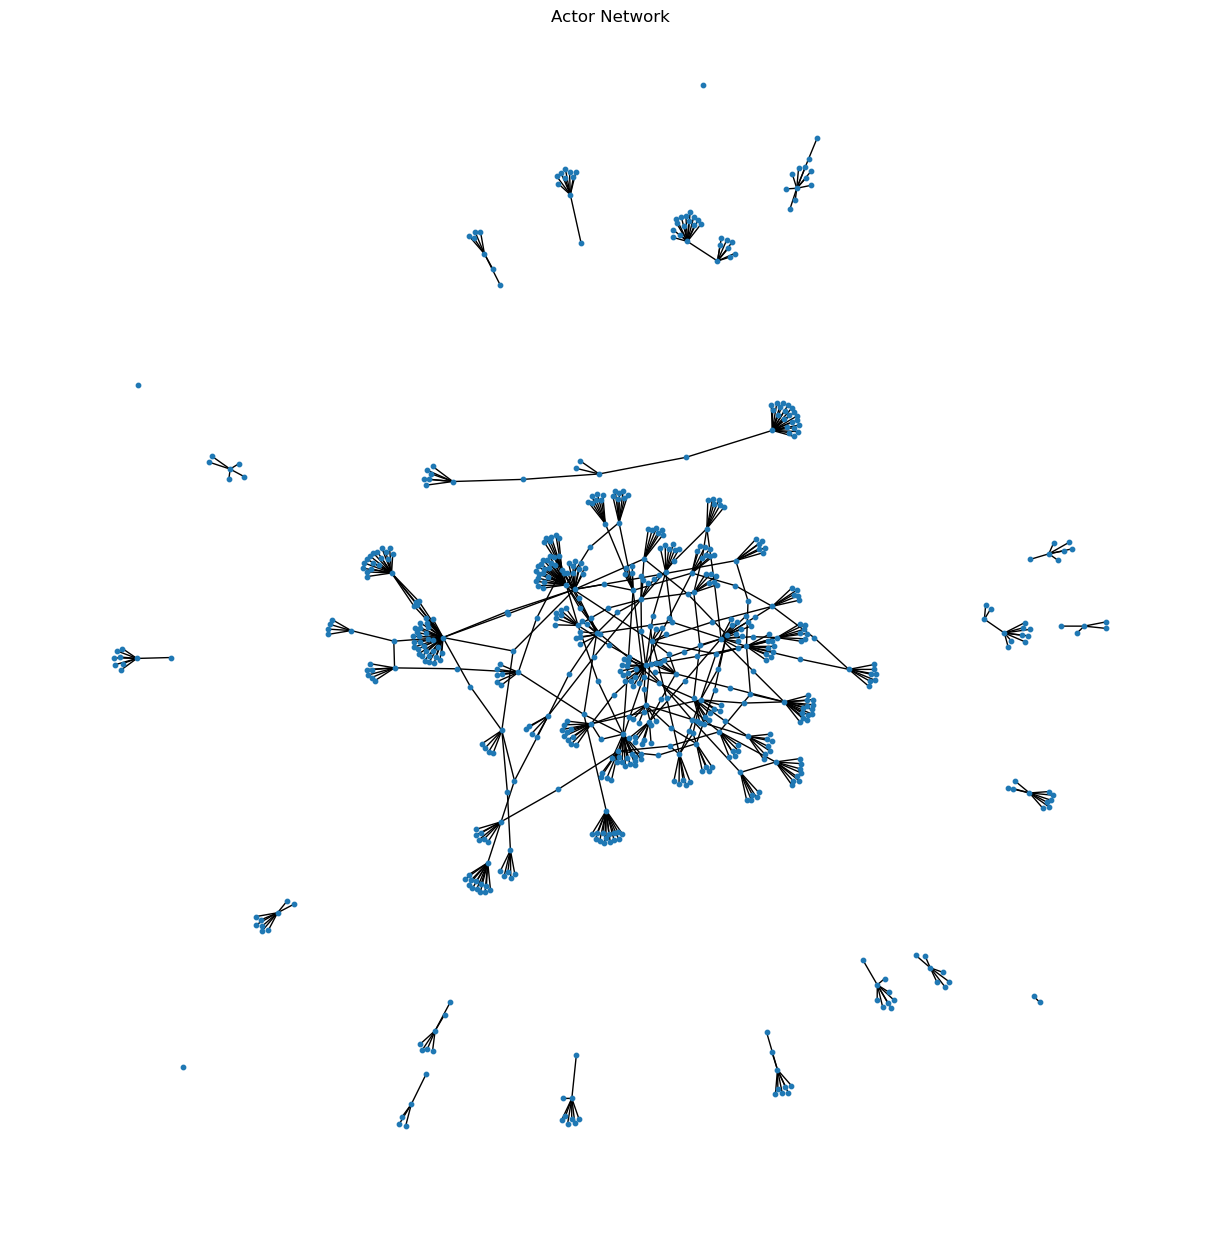

In [4]:
import matplotlib.pyplot as plt
# larger figure size
plt.figure(3,figsize=(12,12)) 
nx.draw(G,node_size=10)
plt.title("Actor Network")
plt.savefig('actors.png')
plt.show()




In [5]:
# this input list contains duplicates
mylist = list(G.nodes()) # 5 & 6 are duplicate numbers.
# find the length of the list
print(len(mylist))
# create a set from the list
myset = set(mylist)
# find the length of the Python set variable myset
print(len(myset))
# compare the length and print if the list contains duplicates
if len(mylist) != len(myset):
    print("duplicates found in the list")
else:
    print("No duplicates found in the list")

684
684
No duplicates found in the list


In [6]:
len(G.edges)

712

In [7]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Stan Laurel', 39),
 ('Irene Dunne', 25),
 ('Charles Chaplin', 22),
 ('Norma Shearer', 22),
 ('Harold Lloyd', 21),
 ('John Barrymore', 17),
 ('Dorothy Mackaill', 17),
 ('Zasu Pitts', 16),
 ('Richard Barthelmess', 16),
 ('Mary Pickford', 15),
 ('John Wayne', 15),
 ('Greta Garbo', 14),
 ('Marion Davies', 14),
 ('Buster Keaton', 13),
 ('Myrna Loy', 11),
 ('Mildred Harris', 10),
 ('Gloria Swanson', 10),
 ('William Boyd', 10),
 ('Colleen Moore', 10),
 ('Robert Armstrong', 10),
 ('Conrad Nagel', 10),
 ('Constance Bennett', 10),
 ('Robert Montgomery', 10),
 ('Walter Huston', 10),
 ('Elliott Dexter', 9),
 ('Florence Vidor', 9),
 ('Gaston Modot', 9),
 ('Yuliya Solntseva', 9),
 ('Helene Costello', 9),
 ('Gary Cooper', 9),
 ('Alice Joyce', 9),
 ('Ronald Colman', 9),
 ('Billie Dove', 9),
 ('Mary Astor', 9),
 ('Lyn Harding', 9),
 ('Ginger Rogers', 9),
 ('Barbara Stanwyck', 9),
 ('Mae Clarke', 9),
 ('Joan Blondell', 9),
 ('Chester Morris', 9),
 ('Courtenay Foote', 8),
 ('Mabel Normand', 8),
 ('Car